# Population Mean Confidence Intervals for Larger Sampels

><strong>Note</strong>: <font color='red'>$\overline{x}$</font> is the mean of single sample,  <font color='red'>$\mu_{x}$</font> is the mean of the sampling distribution of the sample mean and <font color='red'>$\mu$</font> is the population mean

* for reference : https://seeing-theory.brown.edu/frequentist-inference/index.html#section2

<ol style="font-size:120%;">
<li>Consider the poplulation mean is <font color='red'>$\mu$</font>, and suppose you have taken a sample and calculated its mean as <font color='red'>$\overline{x}$</font></li>
<li>Often for a given population we don't know what is the values of <font color='red'>$\mu$</font></li>
<li> Here we try to esitmate the <font color='blue'> <i>unknown</i> <font color='red'>$\mu$</font> </font>with the help of <font color='blue'> known value <font color='red'>$\overline{x}$</font> </font> </li>
</ol>

__<font  color='#7300e6'>Q: Here “Why do we need a sample mean to calculate the population mean? why can't we directly calcualte the mean of the population?” </font>__
<img src='https://i.imgur.com/rgWfmCf.png' width=150>

<font color='#339933'>
Ans: Suppose your population of interest in Delhi, and you want to know the mean age of the population.
<ul>
<li>Due to lack of time, energy, and money, you cannot obtain the age of every person in Delhi.</li> 
<li>You can select a sample (e.g. a simple random sample) and calculate the mean of that sample, <font color='red'>$\overline{x}$</font></li>
</ul>
</font>

__<font  color='#7300e6'>Q: Then “Why don’t we just use the sample mean  <font color='red'>$\overline{x}$</font> to estimate the population mean <font color='red'>$\mu$</font>?” </font>__
<img src='https://i.imgur.com/rgWfmCf.png' width=150>

<font color='#339933'>
<ul> 
<li>We can – but the sample mean <font color='red'>$\overline{x}$</font> may be quite different from the population mean <font color='red'>$\mu$</font>,even if we obtained the sample correctly.</li> 
    
<li>In addition, a single number estimate by itself, such as <font color='red'>$\overline{x}$</font>, provides no information about the precision and reliability of the estimate with respect to the larger population. </li>

</ul>
</font>

<p style="font-family:'Georgia';font-size:18px" >
Statisticians use the sample statistic <font color='red'>$\overline{x}$</font> and the population(<font color='red'>$\sigma$</font>) or sample standard deviation to provide <font color='blue'>an interval of plausible estimates</font> for the population parameter <font color='red'>$\mu$</font>. This interval is called a <font color='blue'>confidence interval.</font>
</p>

> <strong>Definition:</strong> A confidence interval is an entire interval of plausible values for a population parameter, such as <font color='red'>$\mu$</font>, based on observations obtained from a random sample of size <font color='red'>$n$</font>.

Import Section

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
from IPython.display import HTML, display
plt.xkcd()

Output hidden; open in https://colab.research.google.com to view.

Download Datset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sdolezel/black-friday
!unzip /content/black-friday.zip

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/7.51M [00:00<?, ?B/s]
100% 7.51M/7.51M [00:00<00:00, 172MB/s]
Archive:  /content/black-friday.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv('train.csv')
print("number of data points in our popultion:", df.shape)
print("% of missing values",df['Purchase'].isnull().sum() * 100 / len(df))
df.head(2)

number of data points in our popultion: (550068, 12)
% of missing values 0.0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


Number of samples in our data:  550068


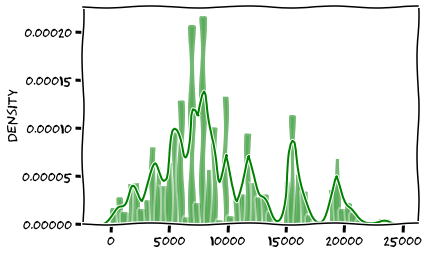

In [ ]:
data = np.array(df['Purchase'].values)
print("Number of samples in our data: ",data.shape[0])
sns.distplot(data, color='g')
plt.show()
# population mean
population_mean = np.round(data.mean(),3)
# population std
population_std = np.round(data.std(),3)

### Let us answer a question

><font color=#EB07BA > __What is the avarage money spent by Male population on black friday ?__</font>

Before we know how to estimate that lets have a look at couple of concepts
<h3>1. <font color='blue'><a href='https://en.wikipedia.org/wiki/Standard_error'>Standard error</a> </font> </h3>
<pre>
 
<li>The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation.</li>
<li>If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM). </li>
<li>The standard error of the mean (SEM) can be expressed as: </li>
</pre>
$$\sigma_\overline{x}=\frac{\sigma}{\sqrt{n}}$$
<pre>
Since the population standard deviation is seldom known, the standard error of the mean(SEM) is usually estimated as the sample standard deviation divided by the square root of the sample size (assuming statistical independence of the values in the sample).
</pre>
$${\displaystyle {\sigma }_{\bar {x}}\ \approx {\frac {s}{\sqrt {n}}}} $$


<h3>2. <font color='blue'> $zScore$</font> and Confidence Levels:</h3>

<ul>
    <li>Let $\alpha$ be a number between 0 and 1, and let 100 * (1 – $\alpha$)% denote the confidence level.
    <br>For example, 
        <ul>
        <li>if $\alpha$ = 0.05, then the corresponding confidence level is 95%. </li>
        <li>If $\alpha$= 0.01, then the confidence level is 99%.</li>
        </ul>
    </li>
    <li>
        Suppose we have a standard normal distribution $Z$. <br>Let $z_\frac{\sigma}{2}$ denote a $zScore$ with α/2 probability to its right. <br>Similarly let -$z_\frac{\sigma}{2}$ denote a $zScore$ with α/2 probability to its left.
    </li>
    <li> Example: <img src='https://i.imgur.com/mntg6h2.png' width=700>
        The value $z_{0.10}$ is the positive z-score that has α/2 = 0.1 probability to its right. The desired $zScore$ is 1.282. <br>The value $-z_{0.25}$ is the negative z-score that has α/2 = 0.25 probability to its left. The
desired $zScore$ is -0.6745.

</ul>



In [ ]:
# https://stackoverflow.com/a/20864883/4084039
import scipy.stats as st
print("zScore for 0.1 probability to right is",st.norm.ppf(1-0.10))
print("zScore for 0.25 probability to left is",st.norm.ppf(0.25))

zScore for 0.1 probability to right is 1.2815515655446004
zScore for 0.25 probability to left is -0.6744897501960817


<strong>Note:</strong> the data we have in hand might not included all the purchases that are made, and assume we have given the whole <font color='blue'>population standard deviation as 5051.</font>

In [ ]:
# we are taking a sample of male persons and calculating their mean
data_male = np.array(df[df['Gender']=='M']['Purchase'].values)
samples = random.sample(range(0, data_male.shape[0]), 100)
print("the mean of money spent by sample set of 100 persons :",data_male[samples].mean())
print("Given that the we have population standard deviation : 5051")

print("From central limit theorem we can say that, the std of sampling distribution of the sample mean is \u03C3/\u221An :", 5051/10)

the mean of money spent by sample set of 100 persons : 9406.42
Given that the we have population standard deviation : 5051
From central limit theorem we can say that, the std of sampling distribution of the sample mean is σ/√n : 505.1


<img src='https://i.imgur.com/vXSIeng.jpg'>

<html>
<body>

__ We know that in normal distribution, given a data point there is $95\%$ probability that it will be within the range [ <font color='red'>$\mu-2\sigma$</font>, <font color='red'>$\mu+2\sigma$</font>] __

<ul>
    <li>The sampling distribution of the sample means is a normal distribution</li>
    <li>Any sample mean we take <font color='red'>$\overline{x}$</font> it is 95% probability that it will be within the range [ <font color='red'>$\mu_{x}-2\sigma_{x}$</font>, <font color='red'>$\mu_{x}+2\sigma_{x}$</font>] $i.e.$ for every 100 sample means typically 95 of them are in this range [ <font color='red'>$\mu_{x}-2\sigma_{x}$</font>, <font color='red'>$\mu_{x}+2\sigma_{x}$</font>]</li>
    <li>It is similar to that for any sample mean we take <font color='red'>$\overline{x}$</font> it is 95% probability that the range [ <font color='red'>$\overline{x}-2\sigma_{x}$</font>, <font color='red'>$\overline{x}+2\sigma_{x}$</font>] will contain distribution mean <font color='red'>$\mu_{x} [\approx \mu]$</font>.
    </li>
</ul>

</body>
</html>




<font color='brown'><b>Question:</b></font> Choose the best interpretation of a 95% confidence interval for the population mean μ? <br>
<font color='blue'><b>Option 1:</b></font> If repeated random samples were taken and the 95% confidence interval was computed for each sample, 95% of the intervals would contain the population mean. <br>
<font color='blue'><b>Option 2:</b></font> The probability that the population mean μ is in the confidence interval is 0.95 <br>
<font color='blue'><b>Option 3:</b></font> 95% of the population distribution is contained in the confidence interval.
<br><br>
<font color='green'><b>Answer:</b></font> The correct answer is <font color='green'><b>Option 1</b></font> please check the above 3 points, <font color='red'><b>Option 2</b></font> is incorrect because it places the probability on $\mu$, instead of on the confidence interval. <font color='red'><b>Option 3</b></font> is incorrect since the confidence interval for the population mean is built using sample means and not values from the population distribution. Using population distribution values would give us a confidence interval that is wider than the one for the population mean.

<font size='3'>From the above equations Let us construct an intravel [<font color='red'>$\overline{x}$- 2\*505.1, $\overline{x}$+2\*505.1</font>] = [<font color='red'> $\overline{x}$- 2\*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{\sigma}{\sqrt{n}}$</font>]</font>

In [ ]:
def plt_confidence_interval(data, sample_mean, population_std, i, j, color):
    sns.distplot(data, color=color, ax=axs[i, j])
    axs[i, j].axvline(data.mean(), linestyle="-", color='k', label="p_mean")
    axs[i, j].axvline(sample_mean, linestyle="--", color='m', label="s_mean")
    axs[i, j].axvline(sample_mean+2*(population_std/np.sqrt(100)), linestyle=":", color='g', label="s_mean+2*SE")
    axs[i, j].axvline(sample_mean-2*(population_std/np.sqrt(100)), linestyle=":", color='g', label="s_mean-2*SE")
    axs[i, j].legend()

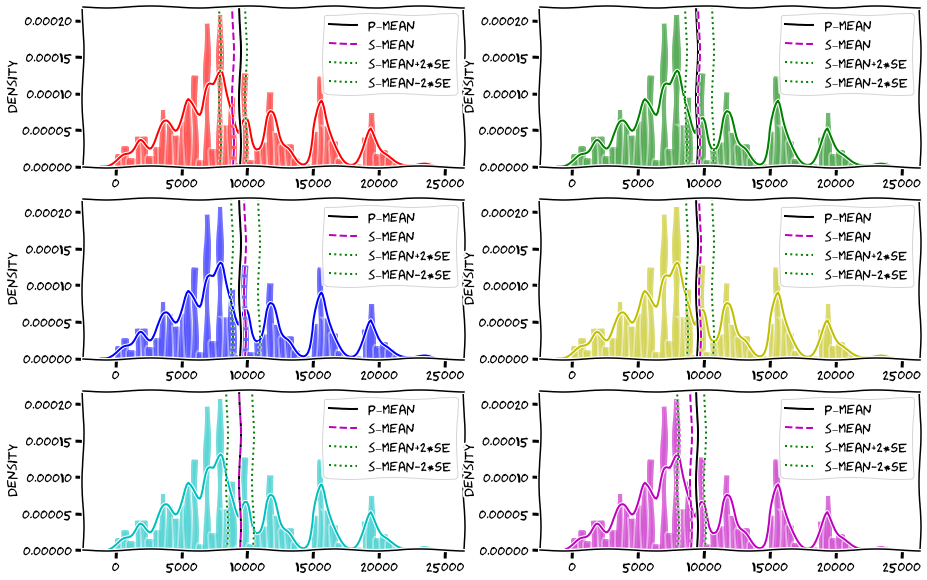

In [ ]:
#red, green, blue, yellow, etc
colrs = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,50), (1000, 50), (100, 100), (1000, 100), (100, 1000), (1000, 1000)]

fig, axs = plt.subplots(3, 2,  figsize=(15, 10))
for i in range(6):
    sample = data_male[random.sample(range(0, data_male.shape[0]), 100)]
    plt_confidence_interval(data_male, np.array(sample).mean(), population_std, plt_grid[i][0],plt_grid[i][1],colrs[i])
plt.show()

In the above figure, the read line show the sample mean <font color='red'>$\overline{x}$</font> and the two green lines shows [<font color='red'> $\overline{x}$- 2\*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{\sigma}{\sqrt{n}}$</font>]

<p style="font-family:'Georgia';font-size:22px" >Note: We have a big Assumption that, we know the population standard deviation as 5051.</p>

## Confidence interval when don't have knowldge about population standard deviation

we know the the cofidenance interval[<font color='red'> $\overline{x}$- 2\*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{\sigma}{\sqrt{n}}$</font>] when we know the popuplation standard deviation. If you observe here we estimating population mean with sample mean (from above pdf plots, the sample mean is almost close to population mean)

__ <font color='#E91BBC'>Can we do the similar estimation of population stadard deviation using sample stadard deviation?</font> __

<font color='#398114'><strong>Ans: Yes, We can estimate it</strong></font>


SE is used is to make confidence intervals of the unknown population mean. If the sampling distribution is normally distributed, the sample mean, the standard error, and the quantiles of the normal distribution can be used to calculate confidence intervals for the true population mean. 

The following expressions can be used to calculate the upper and lower 95% confidence limits


${\text{Upper 95%  limit}{\displaystyle ={\bar {x}}+{\text{SE}}\times 1.96}}$ <br>
${\text{Lower 95%  limit}{\displaystyle ={\bar {x}}-{\text{SE}}\times 1.96}}$

${\displaystyle {\bar {x}}} $ is equal to the sample mean, an estimation to population mean<br>
$SE$ is equal to the standard error for the sample mean, <br>
$1.96$ is the $0.975$ quantile of the normal distribution <br>

<br>
<font color='brown'> But we have taken 0.975 quantile?</font>

<font color='green'> Answer: as we need the confidence level of 95%, the ${\alpha}$ value will be 0.05, so $\frac{\alpha}{2}=0.025$
As we know <br><br>
$${\text{Upper 95%  limit}{\displaystyle ={\bar {x}}+{\text{SE}}\times z_\frac{\alpha}{2}}} = {\bar{x}}+{\text{SE}} \times z_{0.025}  = {\bar{x}}+{\text{SE}} \times 1.96 $$ <br>
$${\text{Lower 95%  limit}{\displaystyle ={\bar {x}}-{\text{SE}}\times z_\frac{\alpha}{2}}} = {\bar{x}}-{\text{SE}} \times z_{0.025}= {\bar{x}}-{\text{SE}} \times 1.96$$


<font size='3'>From the above equations Let us construct an intravel  [<font color='red'> $\overline{x}$- 2\*$\frac{s}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{s}{\sqrt{n}}$</font>]</font>

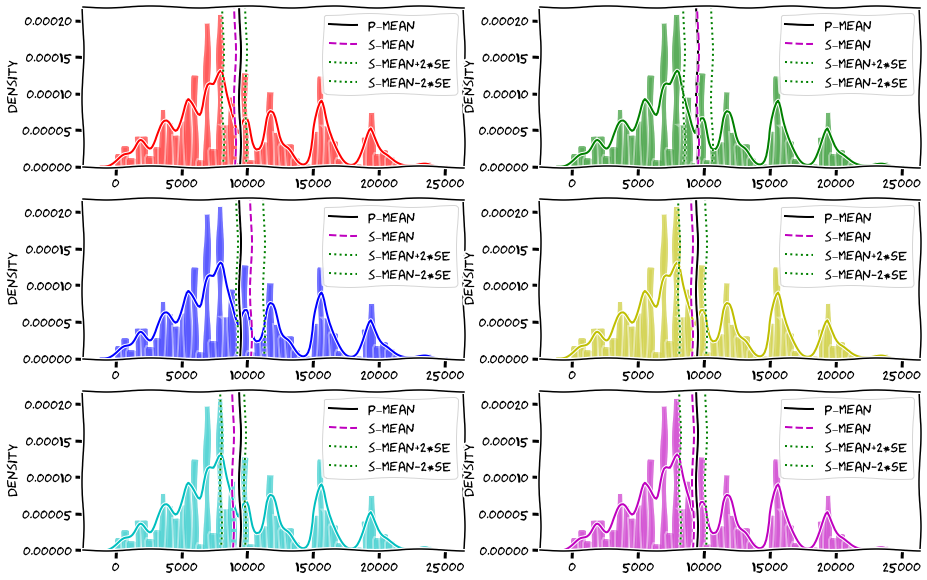

In [ ]:
fig, axs = plt.subplots(3, 2,  figsize=(15, 10))
for i in range(6):
    sample = data_male[random.sample(range(0, data_male.shape[0]), 100)]
    plt_confidence_interval(data_male, np.array(sample).mean(), np.array(sample).std(), plt_grid[i][0],plt_grid[i][1],colrs[i])
plt.show()

__Conclusion: Finding Confidenace interval of population mean__
Case 1: Knowing Population Standard Deviation <font color='red'> ${\sigma}$ </font>  
    <ol>
        <li>Get a sample with decent size(<font color='red'>n</font>) from population and caculate its mean <font color='red'> $\overline{x}$</font></li>
        <li>Report confidence intravel as[<font color='red'> $\overline{x}$- 2*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2*$\frac{\sigma}{\sqrt{n}}$</font>]</li>
    </ol>
</li>
<li>Case 2: Without Knowing Population Standard Deviation 
    <ol>
        <li>Get a sample with decent size(<font color='red'> $n$</font>) from population and caculate its mean <font color='red'> $\overline{x}$</font></li>
        <li>Calculate the sample std <font color='red'>s</font> and find the The standard error of mean or <font color='red' > SE mean </font>as  <font color='red'>$\frac{s}{\sqrt{n}}$</font>.</li>
        <li>report confidence intravel as[<font color='red'> $\overline{x}$- 2*$\frac{s}{\sqrt{n}}$, $\overline{x}$+2*$\frac{s}{\sqrt{n}}$</font>] or [<font color='red'> $\overline{x}$- 2*SE mean, $\overline{x}$+2*SE mean</font>]</li>
    </ol>
</li>
  
        

### Example Problems on confidence interval

><font color=#EB07BA >Given the population standard deviation as 5051 , and 10 samples each of size 100 and thier respective sample means is given , then what is the 95% C.I for the mean of population?.</font>

___Solution___:
<ul>
   Take 10 random samples each of size 100 from our data and calculate their mean <font color='red'> $\overline{x}$</font>
    <li> Now for every sample , calculate the 95% C.I as [<font color='red'> $\overline{x}$- 2*$\frac{5051}{\sqrt{n}}$, $\overline{x}$+2*$\frac{5051}{\sqrt{n}}$</font>]. We get <font color='red'> 10 </font> C.I , one for each sample.</li>
    <li> Ideally, instead of 10 samples if we take 100 samples(we get 100 C.Is), 95 C.I's must catch true Pop mean, i.e. true population mean must be in range for approximately 95 Confidence Intervals. So, for 10 samples, we might see 9 C.I's catching the Pop mean. Let's see practically by comparing it with Pop mean.</li>
    </ul>

In [ ]:
x = PrettyTable()
x = PrettyTable(["#samples", "Sample Size", "Sample mean", "Pop Std","Left C.I","Right C.I","Pop mean","Catch"])
male_population_std = data_male.std()
male_population_mean= np.round(data_male.mean(), 3)
for i in range(10):
    sample=data_male[random.sample(range(0, data_male.shape[0]), 100)]
    sample_mean = sample.mean()
    sample_size = len(sample)
    left_limit  = np.round(sample_mean - 2*(male_population_std/np.sqrt(sample_size)), 3)
    right_limit = np.round(sample_mean + 2*(male_population_std/np.sqrt(sample_size)), 3)
    row = []
    row.append(i+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(population_std)
    row.append(left_limit)
    row.append(right_limit)
    row.append(male_population_mean)
    row.append((male_population_mean <= right_limit) and (male_population_mean >= left_limit))
    x.add_row(row)
print(x)

+----------+-------------+-------------+----------+----------+-----------+----------+-------+
| #samples | Sample Size | Sample mean | Pop Std  | Left C.I | Right C.I | Pop mean | Catch |
+----------+-------------+-------------+----------+----------+-----------+----------+-------+
|    1     |     100     |   9687.43   | 5023.061 | 8668.994 | 10705.866 | 9437.526 |  True |
|    2     |     100     |   9364.83   | 5023.061 | 8346.394 | 10383.266 | 9437.526 |  True |
|    3     |     100     |   9852.56   | 5023.061 | 8834.124 | 10870.996 | 9437.526 |  True |
|    4     |     100     |   9873.84   | 5023.061 | 8855.404 | 10892.276 | 9437.526 |  True |
|    5     |     100     |   9527.85   | 5023.061 | 8509.414 | 10546.286 | 9437.526 |  True |
|    6     |     100     |   8756.54   | 5023.061 | 7738.104 |  9774.976 | 9437.526 |  True |
|    7     |     100     |   9473.45   | 5023.061 | 8455.014 | 10491.886 | 9437.526 |  True |
|    8     |     100     |   9306.71   | 5023.061 | 8288.274

Now assuming that <b>we don't know the population std</b>

><font color=#EB07BA >Given 10 sample each with their sample mean and sample std find the 95% confidence interval for each of the sample and compare it with population mean.(Population Std unknown)</font>

## Solution:

* Take 10 random samples each of size 100 from our data and calculate their mean <font color='red'> $\overline{x}$</font> and also thier standard deviation <font color='red'>$s$</font> 
* Now for as we don't know the population deviation, we can take the standard error of mean or <font color='red' > SE mean </font>as  <font color='red'>$\frac{s}{\sqrt{n}}$</font> and calculate the 95% C.I as [<font color='red'> $\overline{x}$- 2*$\frac{s}{\sqrt{n}}$, $\overline{x}$+2*$\frac{s}{\sqrt{n}}$</font>]. We get <font color='red'> 10 </font> C.I , one for each sample.
* Ideally , instead of 10 samples if we take 100 samples(we get 100 C.Is), 95 C.I's must catch true Pop mean ,i.e true population mean must be in range for approximately 95 Confidence Intervals. So , for 10 samples , we might see 9 C.I's catching the Pop mean . Let's see practically by comparing it with Pop mean.


In [ ]:
x = PrettyTable()
x = PrettyTable(["#samples", "Sample Size", "Sample mean", "Pop Std","Left C.I","Right C.I","Pop mean","Catch"])
for i in range(10):
    sample=data_male[random.sample(range(0, data_male.shape[0]), 100)]
    sample_mean = sample.mean()
    sample_std =  sample.std()
    sample_size = len(sample)
    # here we are using sample standard deviation instead of population standard deviation
    left_limit  = np.round(sample_mean - 2*(sample_std/np.sqrt(sample_size)), 3)
    right_limit = np.round(sample_mean + 2*(sample_std/np.sqrt(sample_size)), 3)
    row = []
    row.append(i+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(population_std)
    row.append(left_limit)
    row.append(right_limit)
    row.append(male_population_mean)
    row.append((male_population_mean <= right_limit) and (male_population_mean >= left_limit))
    x.add_row(row)
print(x)

+----------+-------------+-------------+----------+----------+-----------+----------+-------+
| #samples | Sample Size | Sample mean | Pop Std  | Left C.I | Right C.I | Pop mean | Catch |
+----------+-------------+-------------+----------+----------+-----------+----------+-------+
|    1     |     100     |   10183.27  | 5023.061 | 9158.169 | 11208.371 | 9437.526 |  True |
|    2     |     100     |   9905.05   | 5023.061 | 8947.794 | 10862.306 | 9437.526 |  True |
|    3     |     100     |   10299.02  | 5023.061 | 9327.064 | 11270.976 | 9437.526 |  True |
|    4     |     100     |   9094.08   | 5023.061 | 8107.774 | 10080.386 | 9437.526 |  True |
|    5     |     100     |   10257.32  | 5023.061 | 9158.631 | 11356.009 | 9437.526 |  True |
|    6     |     100     |   9327.22   | 5023.061 | 8312.728 | 10341.712 | 9437.526 |  True |
|    7     |     100     |   9646.57   | 5023.061 | 8637.204 | 10655.936 | 9437.526 |  True |
|    8     |     100     |   10914.17  | 5023.061 | 9891.915